In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
df = pd.read_csv("gt_full.csv", index_col=0)
df.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
1,4.5878,1018.7,83.675,3.5758,23.979,1086.2,549.83,134.67,11.898,0.32663,81.952
2,4.2932,1018.3,84.235,3.5709,23.951,1086.1,550.05,134.67,11.892,0.44784,82.377
3,3.9045,1018.4,84.858,3.5828,23.990,1086.5,550.19,135.10,12.042,0.45144,83.776
4,3.7436,1018.3,85.434,3.5808,23.911,1086.5,550.17,135.03,11.990,0.23107,82.505
5,3.7516,1017.8,85.182,3.5781,23.917,1085.9,550.00,134.67,11.910,0.26747,82.028


In [3]:
# get summary of the dataset 
print(df.describe())
# get more information about the variables
print(df.info())

                 AT            AP            AH          AFDP          GTEP  \
count  36733.000000  36733.000000  36733.000000  36733.000000  36733.000000   
mean      17.712726   1013.070165     77.867015      3.925518     25.563801   
std        7.447451      6.463346     14.461355      0.773936      4.195957   
min       -6.234800    985.850000     24.085000      2.087400     17.698000   
25%       11.781000   1008.800000     68.188000      3.355600     23.129000   
50%       17.801000   1012.600000     80.470000      3.937700     25.104000   
75%       23.665000   1017.000000     89.376000      4.376900     29.061000   
max       37.103000   1036.600000    100.200000      7.610600     40.716000   

                TIT           TAT           TEY           CDP            CO  \
count  36733.000000  36733.000000  36733.000000  36733.000000  36733.000000   
mean    1081.428084    546.158517    133.506404     12.060525      2.372468   
std       17.536373      6.842360     15.618634    

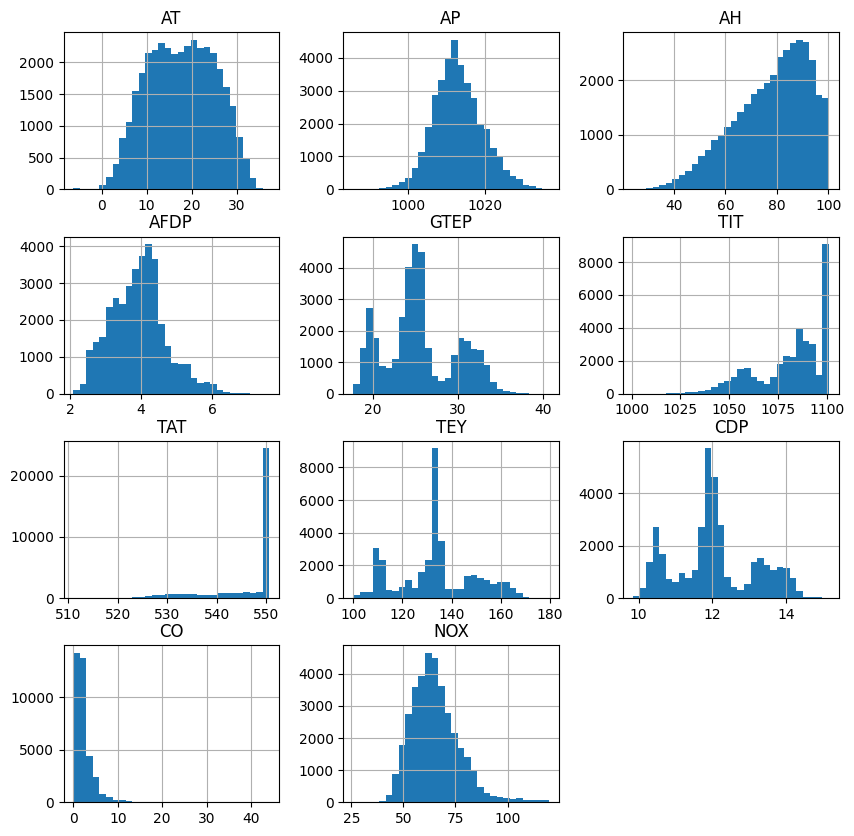

In [4]:
# create histogram for each variabel to check normality.
df.hist(bins = 30, figsize= (10, 10) )
plt.show()

<Axes: >

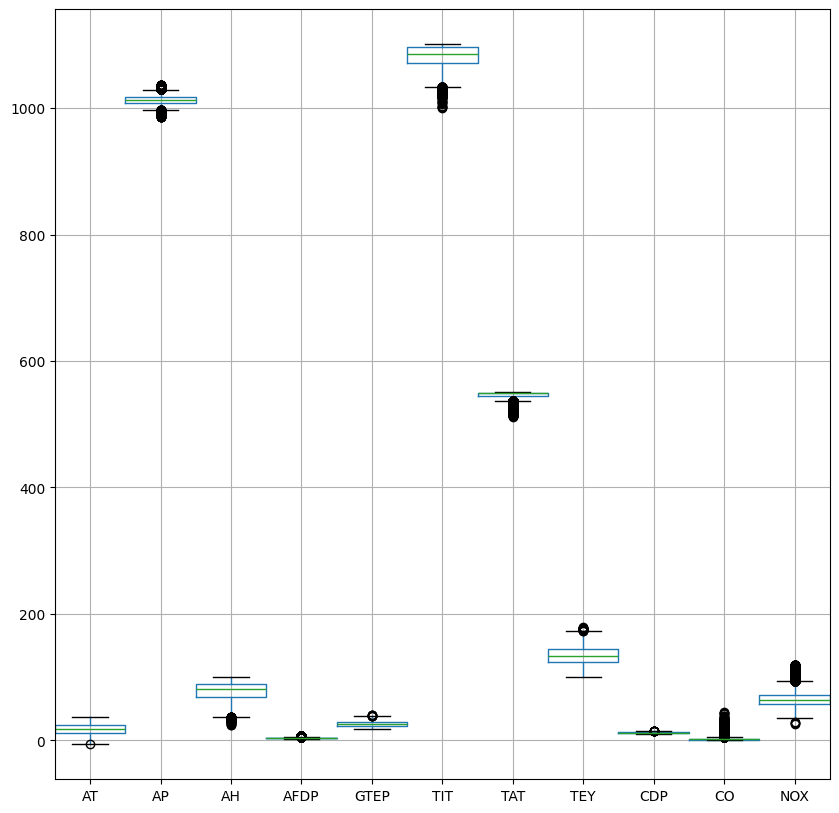

In [5]:
# Check the outliers 

df.boxplot(figsize = (10, 10), widths = 1)

In [11]:
# creating head map with correlation values. 

'''
The code below is copied from:
https://stackoverflow.com/questions/39409866/correlation-heatmap
'''
# import the packages
import seaborn as sns

cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]
corr = df.corr()
corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_table_styles(magnify())

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
AT,1.000000,-0.406601,-0.476291,0.251974,0.045851,0.183706,0.281869,-0.091152,0.015287,-0.174326,-0.558174
AP,-0.406601,1.000000,-0.015184,-0.040363,0.057533,-0.005390,-0.225601,0.118224,0.102636,0.067050,0.191938
AH,-0.476291,-0.015184,1.000000,-0.147840,-0.235153,-0.221809,0.022965,-0.137360,-0.196275,0.106586,0.164617
AFDP,0.251974,-0.040363,-0.147840,1.000000,0.678485,0.691292,-0.466882,0.665483,0.702568,-0.448425,-0.188247
GTEP,0.045851,0.057533,-0.235153,0.678485,1.000000,0.874234,-0.699703,0.964127,0.978470,-0.518909,-0.201630
TIT,0.183706,-0.005390,-0.221809,0.691292,0.874234,1.000000,-0.380862,0.910297,0.908469,-0.706275,-0.213865
TAT,0.281869,-0.225601,0.022965,-0.466882,-0.699703,-0.380862,1.000000,-0.682396,-0.706438,0.058353,-0.092791
TEY,-0.091152,0.118224,-0.137360,0.665483,0.964127,0.910297,-0.682396,1.000000,0.988778,-0.569813,-0.116127
CDP,0.015287,0.102636,-0.196275,0.702568,0.978470,0.908469,-0.706438,0.988778,1.000000,-0.551027,-0.171256
CO,-0.174326,0.067050,0.106586,-0.448425,-0.518909,-0.706275,0.058353,-0.569813,-0.551027,1.000000,0.340606


<h2>Models</h2>

Let's find out of I can create a simple linear and random forest model for this data.

In [12]:
# prepare the data for the model
# select the only NOX as target variabel
nox_df = df.copy()
nox_df = nox_df.drop("CO", axis = 1) # drop the target variable CO

In [13]:
# split the data for training and test using sklearn train_test_split function 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer

# split the data 
X = nox_df.iloc[:, 0:-1]
y = nox_df["NOX"]

# normalize the X and y.
X = nox_df = Normalizer().fit_transform(X)
# normalize the data 

X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size = 0.2,random_state= 0, shuffle = True)

<h2>Model-1:Linear regression</h2>

In [15]:
# import the packges for linear regression
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression ()
linear_model.fit(X_train, y_train)

LinearRegression()

In [16]:
# evalute the model with MAE
from sklearn.metrics import mean_absolute_error
y_pred = linear_model.predict(X_test)
mae_linear = mean_absolute_error(y_test, y_pred)
print("MAE on testset is:", round(mae_linear, 3))

MAE on testset is: 5.906


<h2>Model-2:RandomForest</h2>

In [17]:
# evaluate random forest ensemble for regression
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.ensemble import RandomForestRegressor
# define dataset
# define the model
model = RandomForestRegressor( )
# evaluate the model
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('MAE on cross validation set : %.3f (%.3f)' % (abs(mean(n_scores)), std(n_scores)))

MAE on cross validation set : 2.773 (0.056)


In [18]:
# fit the model 
model = RandomForestRegressor(random_state =0)
model = model.fit(X_train, y_train)

In [19]:
# MAE on test set again
from sklearn.metrics import mean_absolute_error
from sklearn import metrics 

y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)

print("MAE on test set:", round (mae, 3))

MAE on test set: 2.693
